# Gate Tomography of various controls

In [1]:
from optimal_control.gaussian_control import GaussianControl
from optimal_control.paper_smooth_optimal_control import PaperSmoothOptimalControl
from optimal_control.qiskit_control import QiskitControl
from util.Q_setup import QSetUp
from util.tomography import Tomography

Q_setup = QSetUp()
tomography = Tomography(Q_setup)

qiskit_control = QiskitControl(Q_setup)
paper_smooth_optimal_control = PaperSmoothOptimalControl(Q_setup)
gaussian_control = GaussianControl(Q_setup)

Sampling time: 0.2222222222222222 ns
Qubit 0 has an estimated frequency of 4.971657401710924 GHz.


Job Status: job has successfully run
[[0.04589844+0.j         0.0078125 +0.00488281j]
 [0.0078125 -0.00488281j 0.95410156+0.j        ]]
[[0.96289062+0.j         0.01171875-0.01074219j]
 [0.01171875+0.01074219j 0.03710938+0.j        ]]
[[0.50585938+0.j         0.46777344+0.00195312j]
 [0.46777344-0.00195312j 0.49414062+0.j        ]]
[[ 0.50878906+0.j        -0.00097656+0.4609375j]
 [-0.00097656-0.4609375j  0.49121094+0.j       ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)


[[ 1.78222656e-02+0.j          4.88281250e-03+0.00610352j
   1.70898438e-03+0.00146484j  2.19726562e-03+0.00292969j]
 [ 4.88281250e-03-0.00610352j  9.40185547e-01+0.j
   2.19726562e-03-0.0078125j  -2.44140625e-04+0.00146484j]
 [ 1.70898438e-03-0.00146484j  2.19726562e-03+0.0078125j
   1.83105469e-02+0.j         -4.88281250e-03+0.00170898j]
 [ 2.19726562e-03-0.00292969j -2.44140625e-04-0.00146484j
  -4.88281250e-03-0.00170898j  2.36816406e-02+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:2428: ComplexWarning: Casting complex values to real discards the imaginary part
  polys[..., i] = p + dp * cuboid[..., i]
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


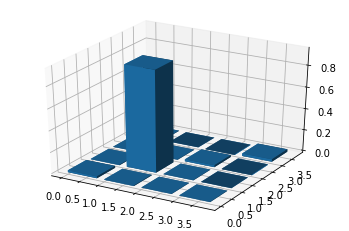

In [12]:
pi_process_matrix = tomography.gate_tomography(qiskit_control.gate['X'], qiskit_control.gate, detuning = 0)
print(pi_process_matrix)
tomography.plot_density_matrix(pi_process_matrix)

In [9]:
import numpy as np
ideal_process_matrix = np.zeros((4, 4))
ideal_process_matrix[1][1] = 1
tomography.gate_fidelity(pi_process_matrix.reshape(4, 4), ideal_process_matrix)

(0.9978612686420356+0j)

Job Status: job has successfully run
[[ 0.06054688+0.j       -0.00390625+0.015625j]
 [-0.00390625-0.015625j  0.93945312+0.j      ]]
[[ 0.97070312+0.j         -0.12304688-0.08203125j]
 [-0.12304688+0.08203125j  0.02929688+0.j        ]]
[[0.45117188+0.j         0.46679688-0.15429688j]
 [0.46679688+0.15429688j 0.54882812+0.j        ]]
[[0.54003906+0.j         0.12792969+0.42871094j]
 [0.12792969-0.42871094j 0.45996094+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\optimize.py:705: ComplexWarning: Casting complex values to real discards the imaginary part
  grad[k] = df
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\lbfgsb.py:338: ComplexWarning: Casting complex values to real discards the imaginary part
  isave, dsave, maxls)


[[ 0.05664062+0.j         -0.03173828+0.03662109j -0.06201172+0.01660156j
   0.0078125 -0.03515625j]
 [-0.03173828-0.03662109j  0.97363281+0.j          0.0078125 +0.15625j
  -0.00244141+0.01660156j]
 [-0.06201172-0.01660156j  0.0078125 -0.15625j    -0.01855469+0.j
   0.03173828+0.01220703j]
 [ 0.0078125 +0.03515625j -0.00244141-0.01660156j  0.03173828-0.01220703j
  -0.01171875+0.j        ]]


C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:2428: ComplexWarning: Casting complex values to real discards the imaginary part
  polys[..., i] = p + dp * cuboid[..., i]
C:\Users\jhhop\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


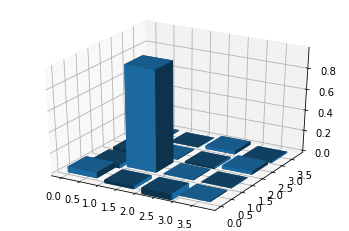

In [6]:
pi_process_matrix = tomography.gate_tomography(paper_smooth_optimal_control.gate['X'], qiskit_control.gate, detuning = 2*Q_setup.MHz)
print(pi_process_matrix)
tomography.plot_density_matrix(pi_process_matrix)

In [7]:
import numpy as np
ideal_process_matrix = np.zeros((4, 4))
ideal_process_matrix[1][1] = 1
tomography.gate_fidelity(pi_process_matrix.reshape(4, 4), ideal_process_matrix)

(0.9645085148690797+0j)